<div style="background-color:#035FCA; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> XLNet(eXtreme Lite Transformer) </div>
<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 📝 Architectural Overview.
 </div>
<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
- It is a state of the art llm developed by CMU and Google AI. It is based on transformer architecture and was designed to overcome the limitations of prev language models such as BERT and GPT2.<br>
- The architecture of XLNet is similar to BERT with some key diff. The main diff being XLNet uses a permutation based training approach which allows it to model dependencies between all tokens in a sequence rather than just the tokens that come before the current token.<br>
 <br>
The block diagram of XLNet consists of three main components.
<br>
- Input embedding layer - This layer takes the input text and converts it into a vector representation that can be processed by the model. The input embedding layer uses a pretrained word embedding model to convert each word in the input text into a vector.<br>
- Transformer encoder layers - The transformer encoder layers are the core buiding blocks of the model. They use self attn mechanism to process the input text and generate a contextualised representation of each word in the text. The transformer encoder layers are stacked on top of each other to create a deep neural network.<br>
- Permutation based training - XLNet uses a permutation based training approach which allows it to model dependencies between all tokens in a sequence rather than just the tokens that come before the current token. This is achieved by randomly permuting the input seq during training and using a modified loss function that takes into account all possible permutations of the input sequence<br>
<br>
The advantages of XLNet are<br>
1. Improved modeling of dependencies. - It is able to model dependencies between all tokens in a sequence rather than just the tokens that come before it. It yields better and coherent text.<br>
2. It performs better on Question-answering, sentiment analysis and text classification in comparision to bert and GPT2.<br>

<div style="background-color:#568FD1; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F;"> 🏢 Architecture Diagram.
 </div>
<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
1. Input Layer:<br>
   - The diagram starts with the "Input Layer" represented by the `input` node. It represents the input text that is fed into the XLNet model for processing.
<br>
2. Segment Embeddings:<br>
   - The input text is passed through the "Segment Embeddings" layer, represented by the `segment` node. This layer assigns different embeddings to different segments or parts of the input text.
<br>
3. Position Embeddings:<br>
   - The input text is also passed through the "Position Embeddings" layer, represented by the `position` node. This layer assigns embeddings based on the position or order of the words in the input text.
<br>
4. Attention Layer:<br>
   - The segment embeddings and position embeddings are combined and fed into the "Attention Layer," represented by the `attention` node. The attention layer performs self-attention, allowing the model to focus on different parts of the input text while considering the dependencies between words.
<br>
5. Feed-Forward Layer:<br>
   - The output from the attention layer is passed through the "Feed-Forward Layer," represented by the `feed_forward` node. This layer applies a neural network with multiple layers and nonlinear transformations to capture complex patterns in the data.
<br>
6. Residual Connections and Layer Normalization:<br>
   - To facilitate better information flow and mitigate the vanishing gradient problem, "Residual Connections" are added between the attention layer and feed-forward layer. The "Add & Layer Norm" operations, represented by `add_norm_1` and `add_norm_2`, respectively, combine the output of the previous layer with its input and apply layer normalization.
<br>
7. Output Layer:<br>
   - Finally, the output from the feed-forward layer passes through the "Output Layer," represented by the `output` node, to generate the final output of the XLNet model.<br>


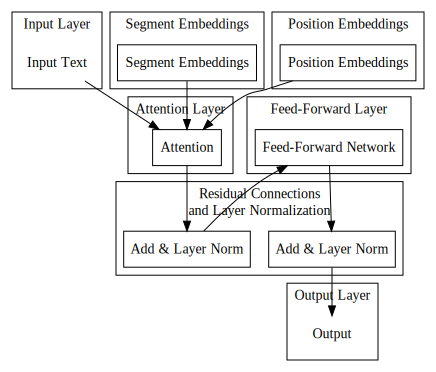

In [16]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/notebook-images/xlnet.svg'
display(SVG(filename=svg_file))

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We import the required libraries including PyTorch, XLNetForSequenceClassification, XLNetTokenizer from the transformers package, and pandas for data handling.</div>



In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import XLNetForSequenceClassification, XLNetTokenizer
from sklearn.metrics import f1_score
import pandas as pd


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We check if a GPU is available and set the device accordingly. This enables GPU acceleration if available.</div>

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We initialize the XLNet model for sequence classification and its corresponding tokenizer. We use the 'xlnet-base-cased' pre-trained model.</div>

In [3]:
# Define XLNet model and tokenizer
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=2)
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'sequence_summary.summary.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We read the Quora Insincere Question Classification dataset from CSV files using pandas.</div>

In [4]:
train_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/train.csv')
test_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/test.csv')


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We tokenize and encode the question texts using the XLNet tokenizer. The encoded sequences include input IDs, attention masks, and the target labels for the training dataset.</div>

In [5]:
train_encoded = tokenizer.batch_encode_plus(train_df['question_text'].tolist(),
                                            add_special_tokens=True,
                                            padding='longest',
                                            truncation=True,
                                            return_tensors='pt', max_length=64) #increase max length to 512 if there are no memory restrictions

In [6]:
test_encoded = tokenizer.batch_encode_plus(test_df['question_text'].tolist(),
                                           add_special_tokens=True,
                                           padding='longest',
                                           truncation=True,
                                           return_tensors='pt',max_length=64)#increase max length to 512 if there are no memory restrictions


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We create data loaders for both the training and test datasets using the encoded sequences. </div>

In [7]:
train_dataset = torch.utils.data.TensorDataset(train_encoded['input_ids'],
                                               train_encoded['attention_mask'],
                                               torch.tensor(train_df['target'].tolist()))
test_dataset = torch.utils.data.TensorDataset(test_encoded['input_ids'], test_encoded['attention_mask'])
train_loader = DataLoader(train_dataset, batch_size=16*4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16*4, shuffle=False)


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
Performed sanity check of the dataloaders</div

In [8]:
for batch in train_loader:
    print(batch)
    break

[tensor([[ 5,  5,  5,  ..., 82,  4,  3],
        [ 5,  5,  5,  ..., 82,  4,  3],
        [ 5,  5,  5,  ..., 82,  4,  3],
        ...,
        [ 5,  5,  5,  ..., 82,  4,  3],
        [ 5,  5,  5,  ..., 82,  4,  3],
        [ 5,  5,  5,  ..., 82,  4,  3]]), tensor([[0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        ...,
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1]]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])]


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We define the number of training epochs and the learning rate.</div

In [9]:
num_epochs = 1
learning_rate = 2e-5


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We specify the loss function (cross-entropy loss) and the optimizer (AdamW) for model training.</div>

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We moved the model to device and put it to train.</div>

In [11]:
model.to(device)
model.train()


XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We train the XLNet model by iterating over the training data loader. The model is set to train mode, and the optimizer is zeroed before computing and backpropagating the loss.</div>

In [12]:
from tqdm import tqdm

for epoch in range(num_epochs):
    total_loss = 0
    for step, (inputs, masks, targets) in enumerate(tqdm(train_loader)):
        inputs, masks, targets = inputs.to(device), masks.to(device), targets.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=inputs, attention_mask=masks)[0]
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        if step%1000==0:
            print("Step - {}, Loss - {}".format(step, loss.item()))
            break

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss}")


  0%|          | 0/20409 [00:01<?, ?it/s]

Step - 0, Loss - 0.8209980726242065
Epoch 1/1, Loss: 0


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We intentionally trained for few steps of epoch 0, you should train more !</div>

In [13]:
model.eval()
predictions = []


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
We switch the model to evaluation mode and iterate over the test data loader to make predictions on the test dataset.</div>

In [14]:
with torch.no_grad():
    for inputs, masks in tqdm(test_loader):
        inputs, masks = inputs.to(device), masks.to(device)
        outputs = model(input_ids=inputs, attention_mask=masks)[0]
        _, predicted_labels = torch.max(outputs, 1)
        predictions.extend(predicted_labels.tolist())

100%|██████████| 5872/5872 [14:44<00:00,  6.64it/s]


<div style="background-color:#A7C6F5; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F;">
submission.csv generated</div>

In [15]:
submission_df = pd.DataFrame({'qid': test_df['qid'], 'prediction': predictions})
submission_df.to_csv('submission.csv', index=False)

In [17]:
submission_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0
